In [2]:
import pandas as pd 

wine_data = pd.read_csv(r"C:\Users\colka\OneDrive\Documents\WebStore\data\datasources\challenges\data\wine.csv")

print(wine_data.head())
wine_data.isnull().sum()


   Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23        1.71  2.43        15.6        127     2.80        3.06   
1    13.20        1.78  2.14        11.2        100     2.65        2.76   
2    13.16        2.36  2.67        18.6        101     2.80        3.24   
3    14.37        1.95  2.50        16.8        113     3.85        3.49   
4    13.24        2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color_intensity   Hue  \
0           0.28             2.29             5.64  1.04   
1           0.26             1.28             4.38  1.05   
2           0.30             2.81             5.68  1.03   
3           0.24             2.18             7.80  0.86   
4           0.39             1.82             4.32  1.04   

   OD280_315_of_diluted_wines  Proline  WineVariety  
0                        3.92     1065            0  
1                        3.40     1050            0  
2                   

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

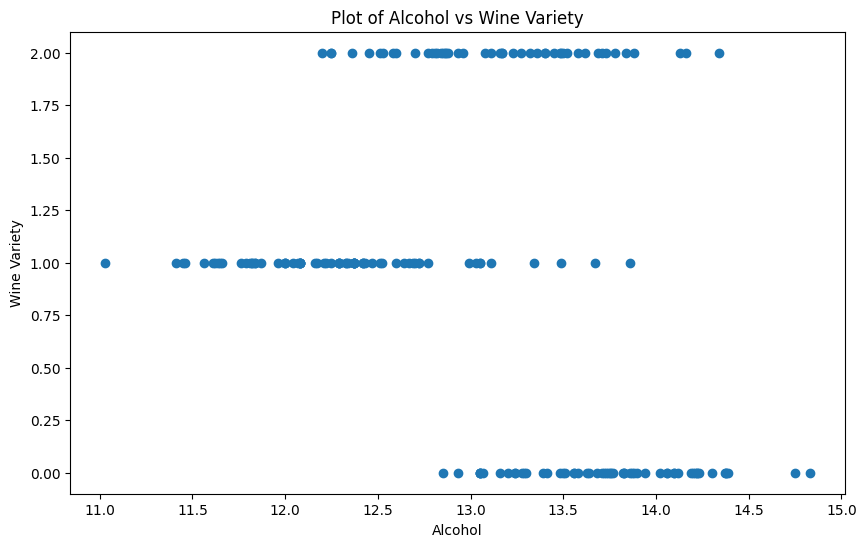

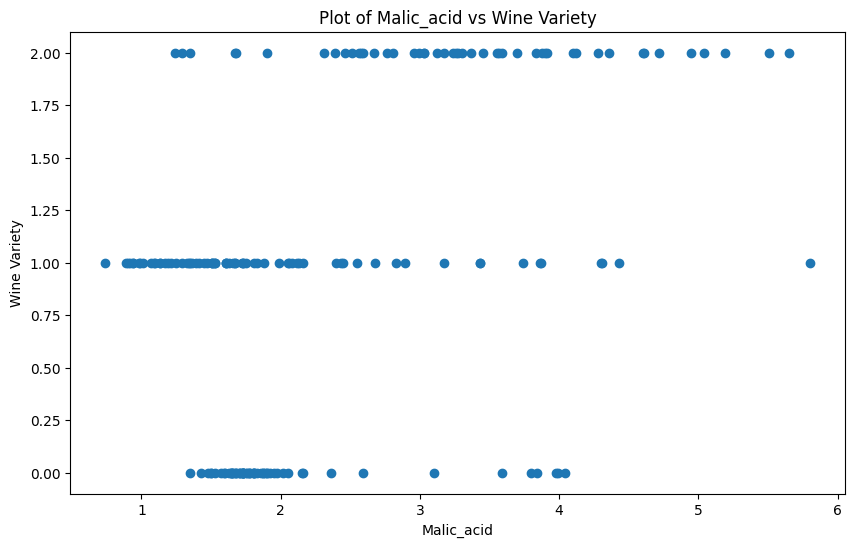

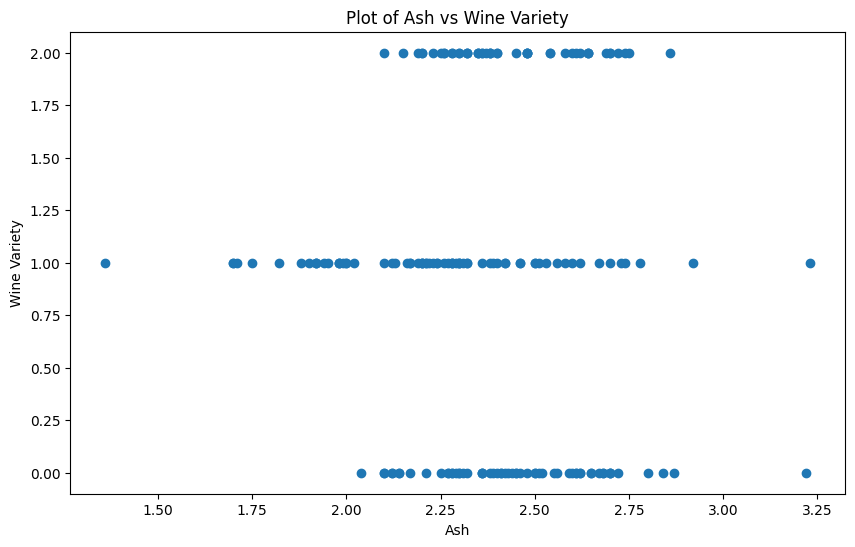

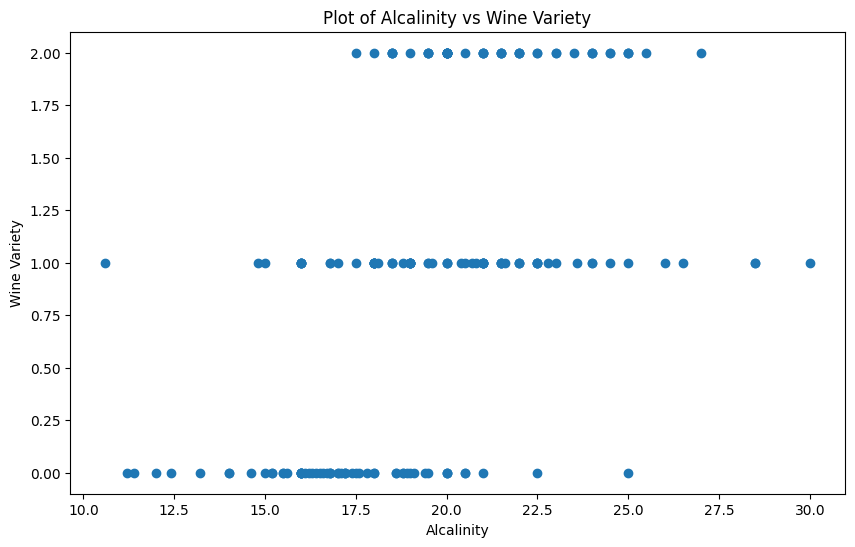

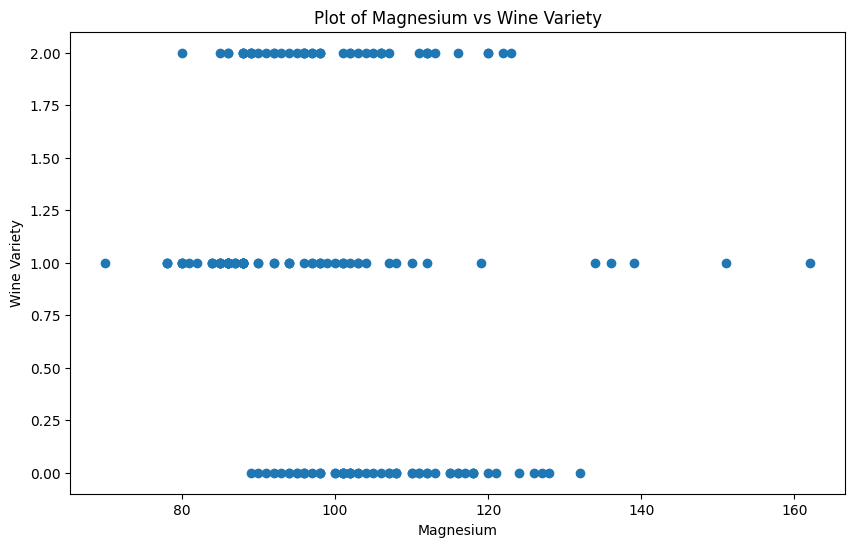

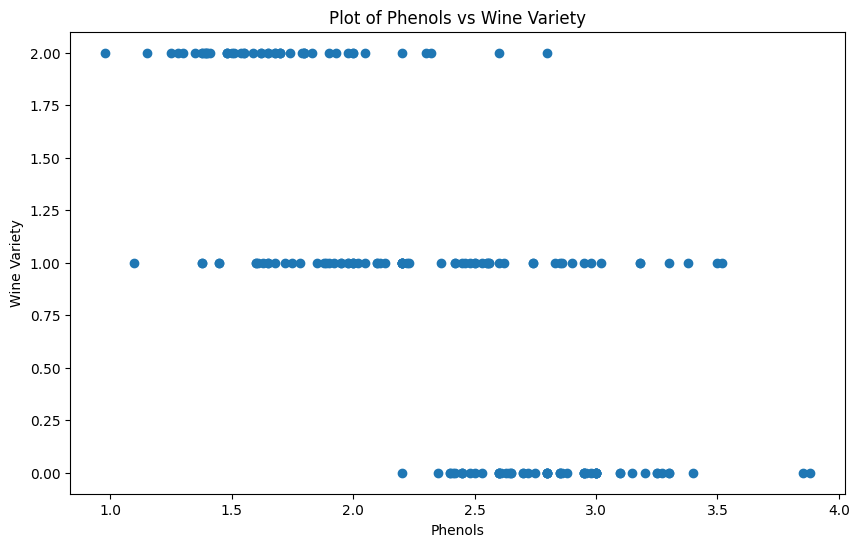

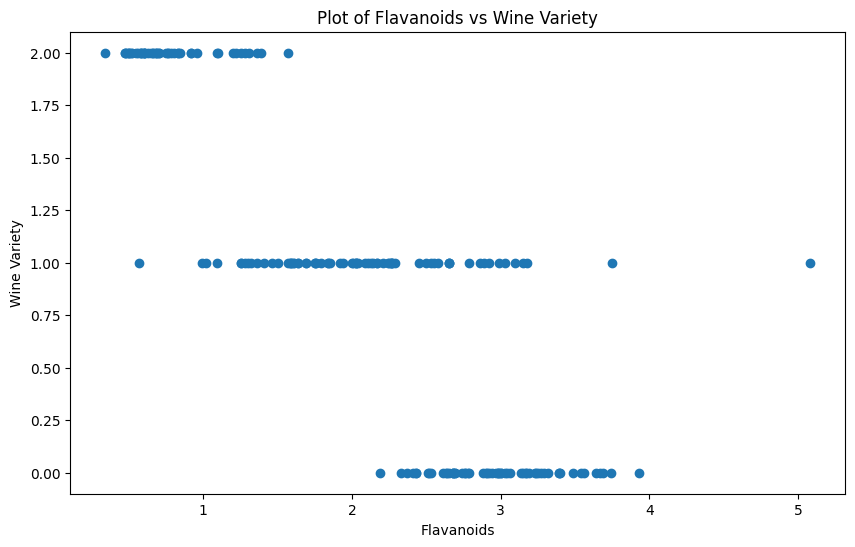

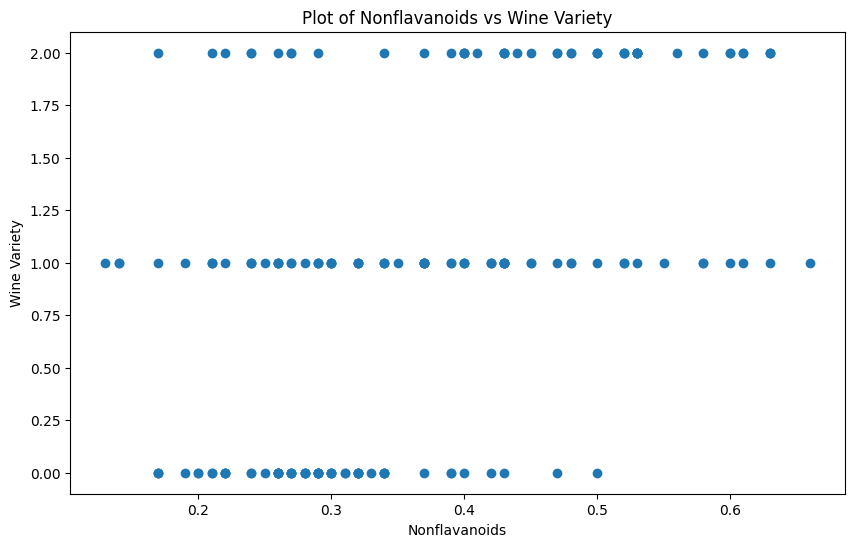

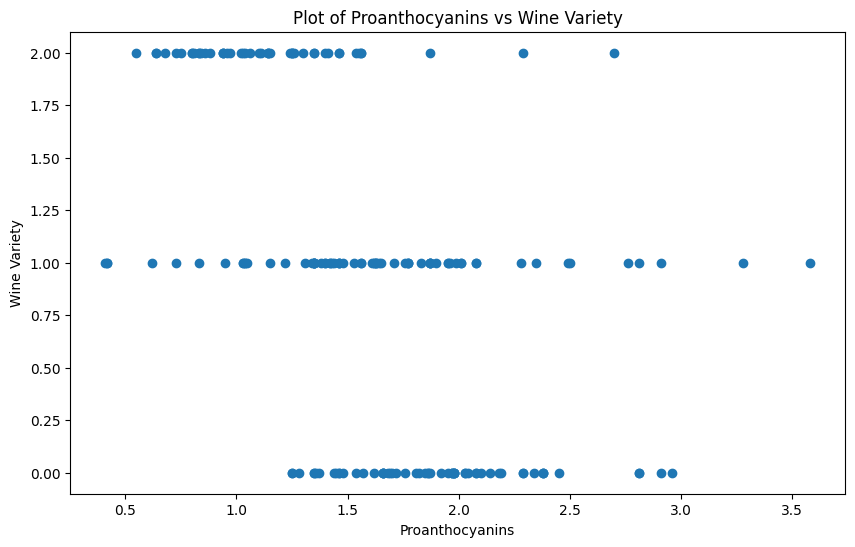

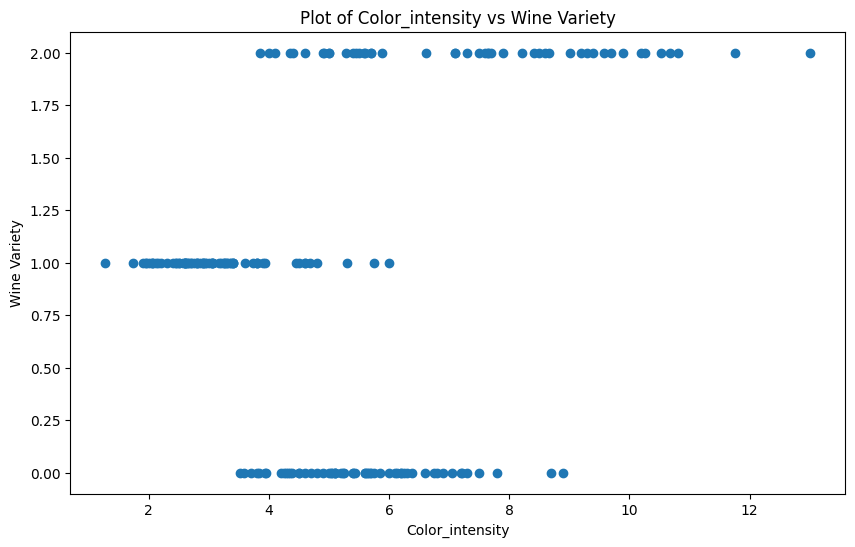

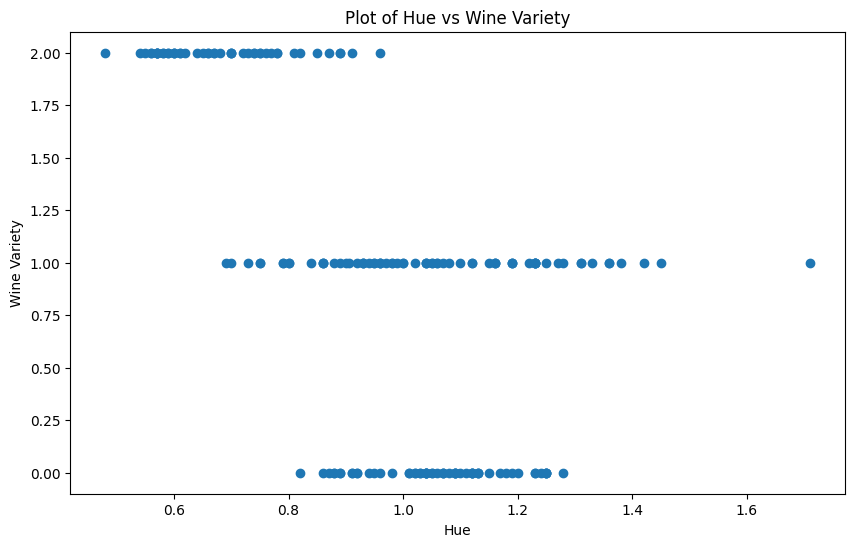

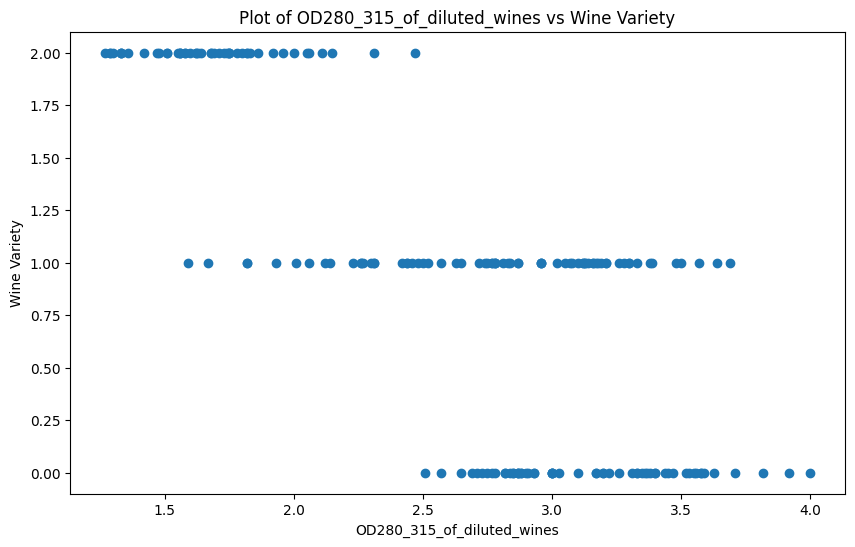

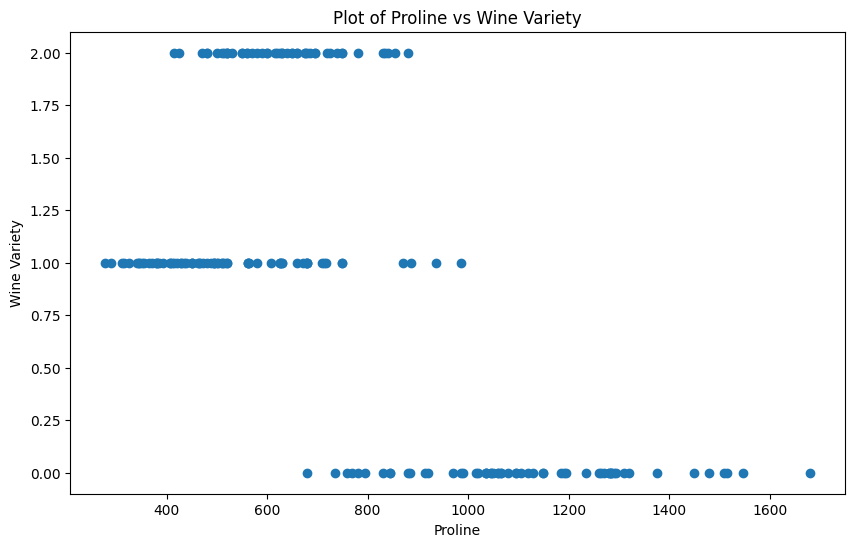

In [3]:
from matplotlib import pyplot as plt

for column in wine_data.columns[0:-1]:
    plt.figure(figsize=(10,6))
    plt.scatter(wine_data[column], wine_data['WineVariety'])
    plt.xlabel(column)
    plt.ylabel('Wine Variety')
    plt.title(f'Plot of {column} vs Wine Variety')
    plt.show()


    

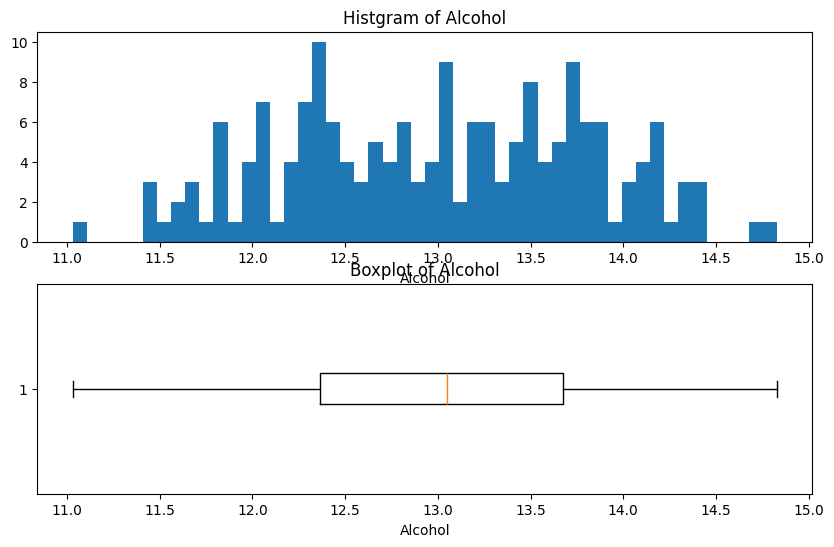

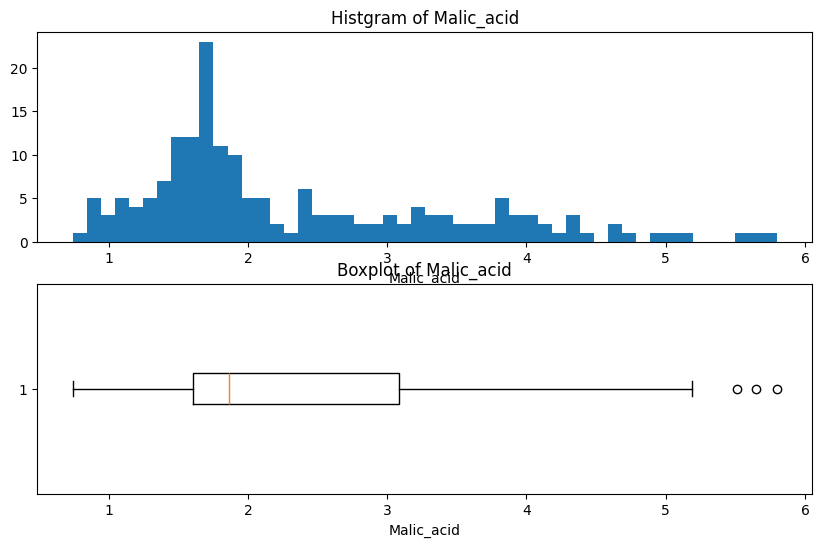

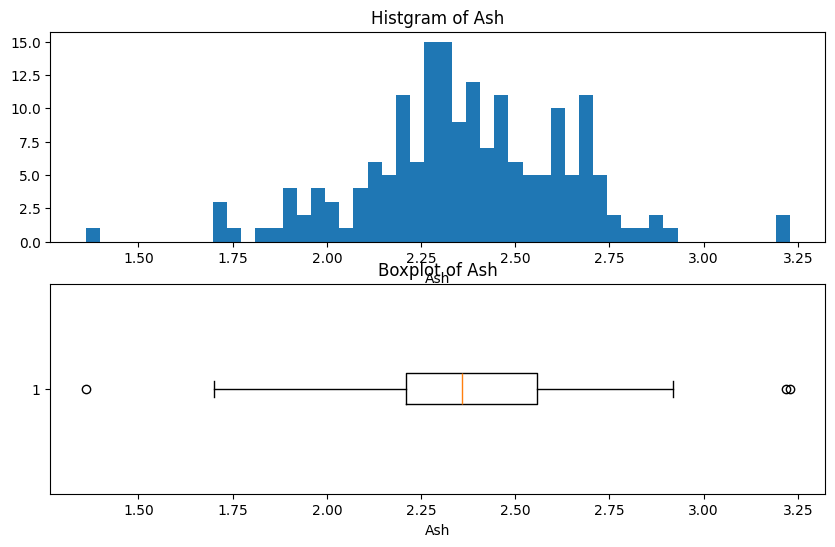

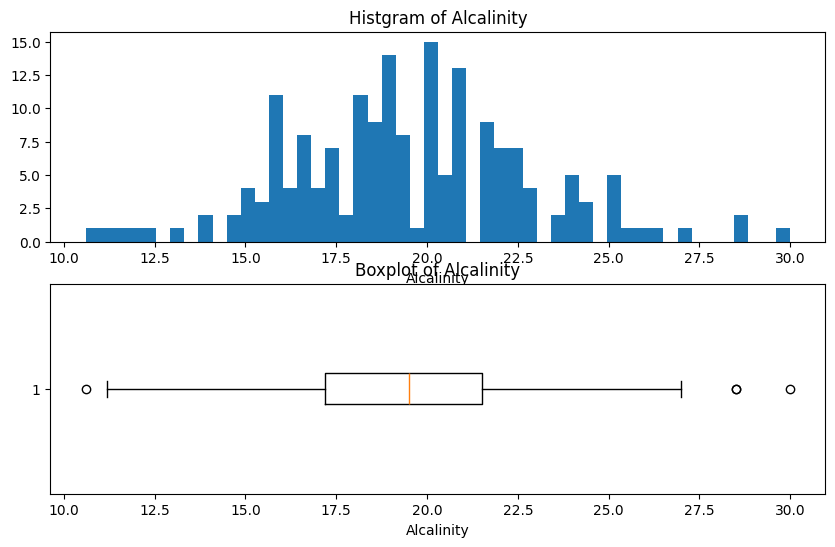

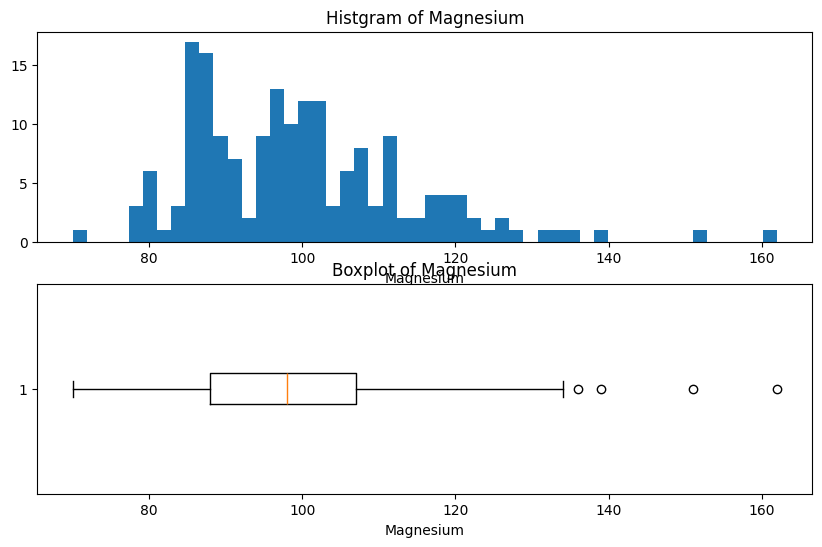

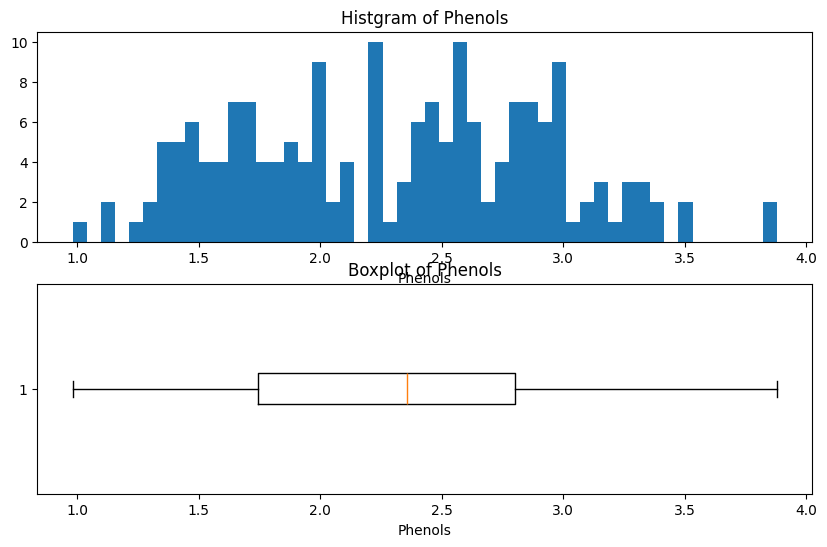

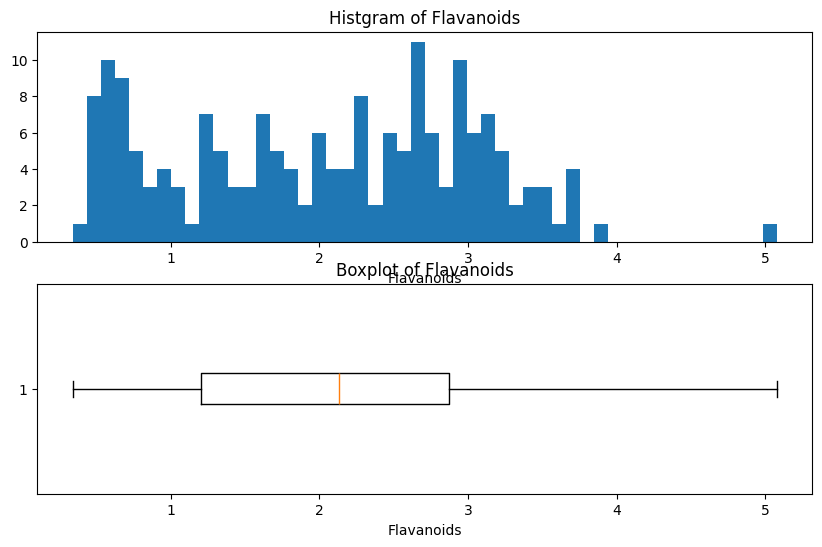

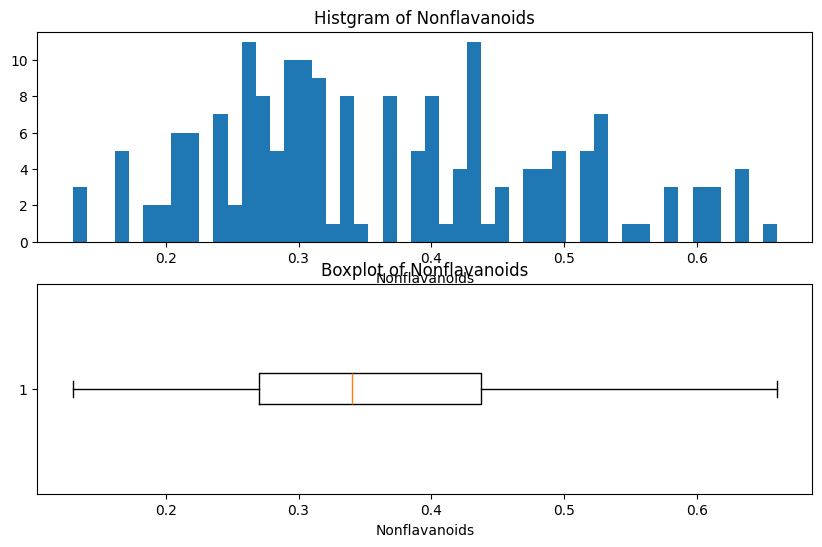

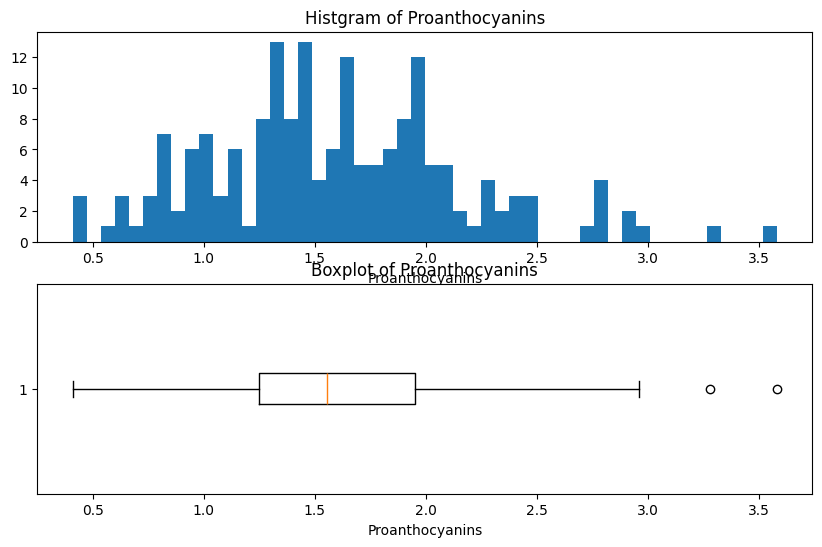

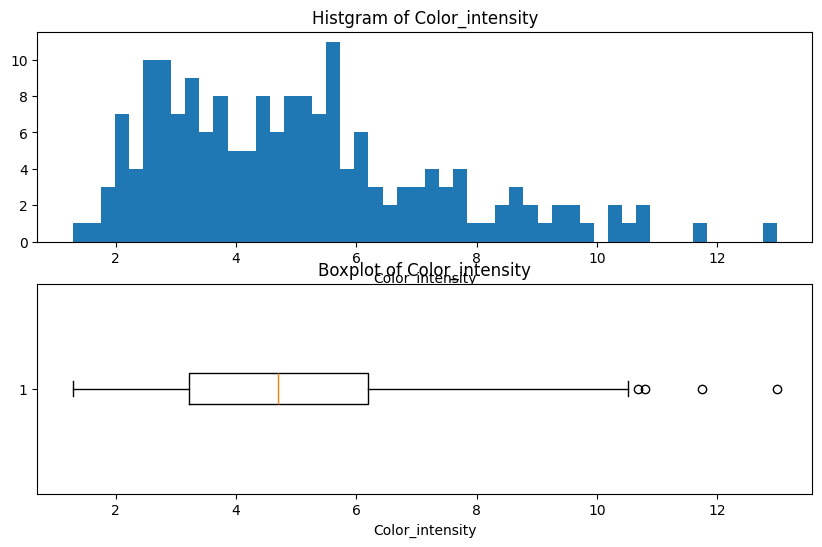

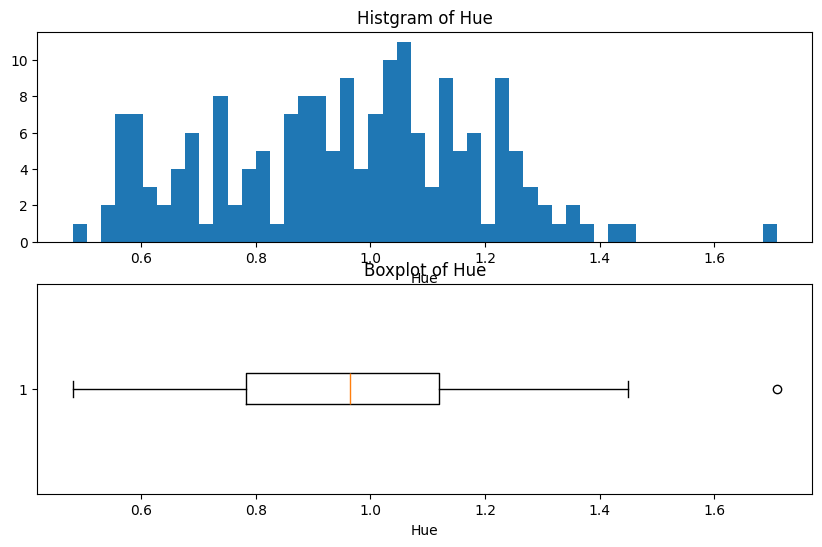

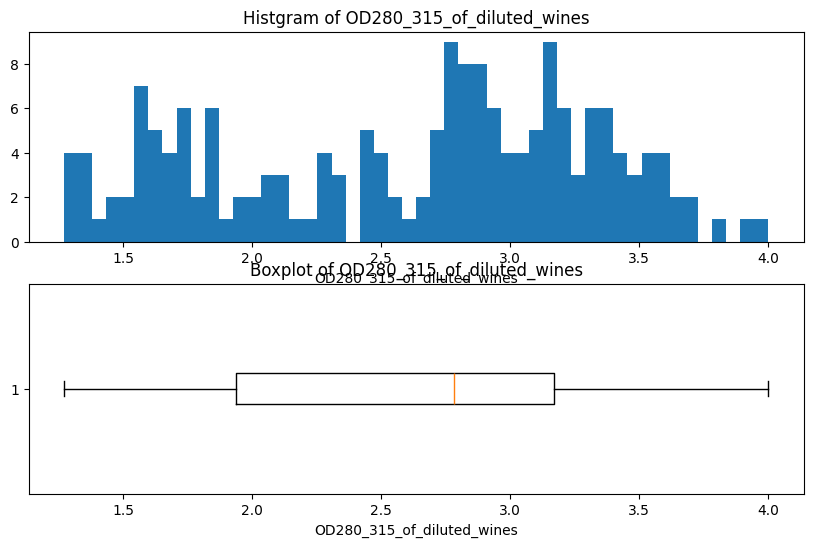

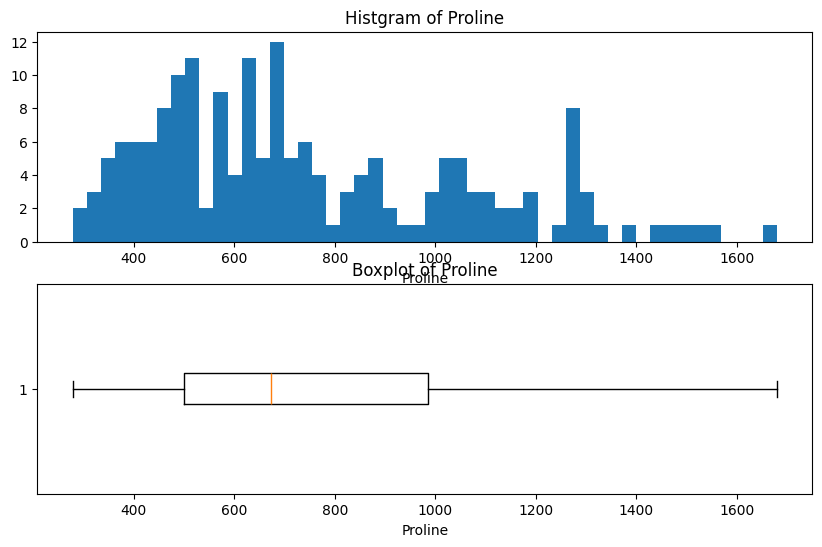

In [4]:
for column in wine_data.columns[0:-1]:
    fig, ax = plt.subplots(2, 1, figsize=(10,6))
    ax[0].hist(wine_data[column], bins = 50)
    ax[0].set_title(f'Histgram of {column}')
    ax[0].set_xlabel(column)
    ax[1].boxplot(wine_data[column], vert = False)
    ax[1].set_title(f'Boxplot of {column}')
    ax[1].set_xlabel(column)
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
1.0


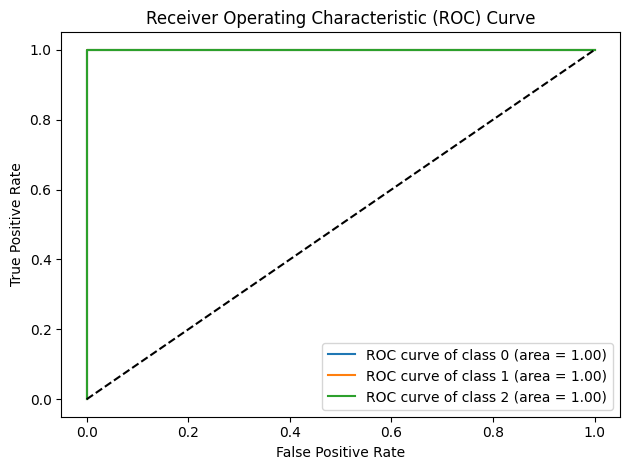

In [9]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

X, y = wine_data.drop('WineVariety', axis=1), wine_data['WineVariety']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

model = pipeline.fit(x_train,y_train)
prediction = model.predict(x_test)

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(model.score(x_test, y_test))

prob = model.predict_proba(x_test)
y_test_bin = label_binarize(y_test, classes=model.classes_)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {model.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [12]:
import joblib
import numpy as np

joblib.dump(model, 'wine-model.pkl')


['wine-model.pkl']

In [14]:
import_model = joblib.load('wine-model.pkl')

x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

feature_names = [
    'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium',
    'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins',
    'Color_intensity', 'Hue', 'OD280_315_of_diluted_wines', 'Proline'
]

x_new = pd.DataFrame(x_new, columns=feature_names)
import_prediction = import_model.predict(x_new)
print(import_prediction)


[0 1]
